In [11]:
from csv import reader

items = []
with open('market_items_5000.csv', 'r') as csvfile:
    csv_reader = reader(csvfile)
    for row in csv_reader:
        items.append(row)

In [12]:
items[0:5]

[['Adjust bad debt'],
 ['Adjust bad debt'],
 ['Adjust bad debt'],
 ['Itemname'],
 ['WHITE HANGING HEART T-LIGHT HOLDER',
  'WHITE METAL LANTERN',
  'CREAM CUPID HEARTS COAT HANGER',
  'KNITTED UNION FLAG HOT WATER BOTTLE',
  'RED WOOLLY HOTTIE WHITE HEART.',
  'SET 7 BABUSHKA NESTING BOXES',
  'GLASS STAR FROSTED T-LIGHT HOLDER']]

In [32]:
from mlxtend.preprocessing import TransactionEncoder
encoder = TransactionEncoder()

transactions = encoder.fit(items).transform(items)
transactions

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [14]:
import pandas as pd

In [15]:
itemsets = pd.DataFrame(transactions, columns = encoder.columns_)

In [16]:
itemsets.head()

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,...,mouldy. thrown away.,reverse 21/5/10 adjustment,samples/damages,showroom,throw away,thrown away,wrong barcode (22467),wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
itemsets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 3129 entries, *Boombox Ipod Classic to wrongly sold sets
dtypes: bool(3129)
memory usage: 14.9 MB


In [18]:
from mlxtend.frequent_patterns import apriori

In [64]:
frequent_itemsets = apriori(itemsets, min_support = 0.01, use_colnames = True)

In [65]:
frequent_itemsets

,support,itemsets
0,0.0158,(10 COLOUR SPACEBOY PEN)
1,0.0110,(12 IVORY ROSE PEG PLACE SETTINGS)
2,0.0130,(12 MESSAGE CARDS WITH ENVELOPES)
3,0.0164,(12 PENCIL SMALL TUBE WOODLAND)
4,0.0256,(12 PENCILS SMALL TUBE RED RETROSPOT)
...,...,...
2420,0.0100,"(JUMBO BAG OWLS, DOTCOM POSTAGE, JUMBO BAG BA..."
2421,0.0104,"(JUMBO BAG OWLS, DOTCOM POSTAGE, RECYCLING BAG..."
2422,0.0106,"(DOTCOM POSTAGE, LUNCH BAG RED RETROSPOT, SMAL..."
2423,0.0110,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY..."


In [12]:
frequent_itemsets.sort_values('support', ascending = False)

,support,itemsets
759,0.1286,(WHITE HANGING HEART T-LIGHT HOLDER)
576,0.1068,(REGENCY CAKESTAND 3 TIER)
631,0.0960,(SET OF 3 CAKE TINS PANTRY DESIGN)
366,0.0918,(JUMBO BAG RED RETROSPOT)
326,0.0880,(HEART OF WICKER SMALL)
...,...,...
1292,0.0100,"(HAND WARMER SCOTTY DOG DESIGN, HAND WARMER OW..."
2121,0.0100,"(WHITE HANGING HEART T-LIGHT HOLDER, VINTAGE S..."
2291,0.0100,"(ROTATING LEAVES T-LIGHT HOLDER, SUKI SHOULDE..."
1900,0.0100,"(PICNIC BASKET WICKER LARGE, PICNIC BASKET WIC..."


In [13]:
length = frequent_itemsets['itemsets'].str.len()

In [15]:
rows = length < 2
frequent_itemsets[rows].sort_values('support', ascending = False)

,support,itemsets
759,0.1286,(WHITE HANGING HEART T-LIGHT HOLDER)
576,0.1068,(REGENCY CAKESTAND 3 TIER)
631,0.0960,(SET OF 3 CAKE TINS PANTRY DESIGN)
366,0.0918,(JUMBO BAG RED RETROSPOT)
326,0.0880,(HEART OF WICKER SMALL)
...,...,...
735,0.0100,(URBAN BLACK RIBBONS)
51,0.0100,(BABUSHKA LIGHTS STRING OF 10)
290,0.0100,(GREEN ROSE WASHBAG)
183,0.0100,(DINOSAUR LUNCH BOX WITH CUTLERY)


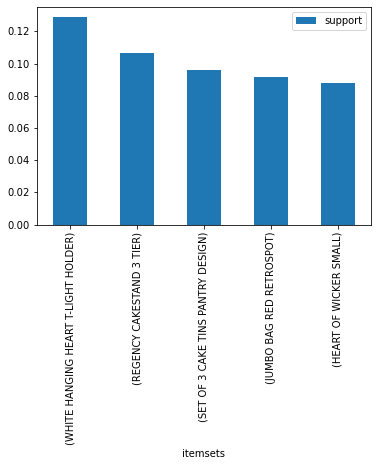

In [20]:
ax = frequent_itemsets[rows].sort_values('support', ascending = False).head().plot.bar(x = 'itemsets', 
                                                                                       y = 'support', rot = 90)

In [23]:
frequent_itemsets.groupby(length)['support'].describe()

,count,mean,std,min,25%,50%,75%,max
itemsets,,,,,,,,
1,789.0,0.021093,0.013172,0.01,0.0126,0.0168,0.0248,0.1286
2,1349.0,0.013056,0.003767,0.01,0.0106,0.0120,0.0140,0.0436
3,276.0,0.011550,0.001786,0.01,0.0102,0.0110,0.0122,0.0220
4,11.0,0.010745,0.000646,0.01,0.0104,0.0106,0.0110,0.0122


In [24]:
from mlxtend.frequent_patterns import association_rules

In [25]:
rules = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED RETROSPOT),0.0200,0.0256,0.0140,0.700000,27.343750,0.013488,3.248000
1,(12 PENCILS SMALL TUBE RED RETROSPOT),(12 PENCILS SMALL TUBE SKULL),0.0256,0.0200,0.0140,0.546875,27.343750,0.013488,2.162759
2,(SKULL SHOULDER BAG),(6 RIBBONS RUSTIC CHARM),0.0226,0.0480,0.0116,0.513274,10.693215,0.010515,1.955927
3,(60 CAKE CASES DOLLY GIRL DESIGN),(PACK OF 72 RETROSPOT CAKE CASES),0.0218,0.0678,0.0112,0.513761,7.577603,0.009722,1.917166
4,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.0432,0.0678,0.0252,0.583333,8.603736,0.022271,2.237280
...,...,...,...,...,...,...,...,...,...
1137,"(JAM MAKING SET WITH JARS, SET OF 6 SPICE TINS...",(JAM MAKING SET PRINTED),0.0188,0.0776,0.0114,0.606383,7.814214,0.009941,2.343395
1138,"(JAM MAKING SET WITH JARS, SET OF 6 SPICE TINS...",(SET OF 3 CAKE TINS PANTRY DESIGN),0.0140,0.0960,0.0114,0.814286,8.482143,0.010056,4.867692
1139,"(JAM MAKING SET WITH JARS, SET OF 3 CAKE TINS ...",(SET OF 6 SPICE TINS PANTRY DESIGN),0.0164,0.0652,0.0114,0.695122,10.661380,0.010331,3.066144
1140,"(SET OF 6 SPICE TINS PANTRY DESIGN, SET OF 3 C...",(JAM MAKING SET WITH JARS),0.0162,0.0718,0.0114,0.703704,9.800887,0.010237,3.132675


In [26]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000
mean,0.018911,0.046026,0.012396,0.685664,22.115444,0.011481,inf
std,0.007452,0.026031,0.003776,0.131334,17.144727,0.003282,NaN
min,0.010000,0.010200,0.010000,0.500000,3.984025,0.008406,1.786922
25%,0.014200,0.023450,0.010400,0.572917,10.135801,0.009766,2.243336
50%,0.017400,0.042000,0.011200,0.662338,16.748151,0.010481,2.823666
75%,0.021200,0.062450,0.012600,0.779364,26.199257,0.011803,4.324250
max,0.071800,0.128600,0.043600,1.000000,77.808901,0.037341,inf


In [27]:
rules.sort_values('lift', ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
874,"(HERB MARKER ROSEMARY, HERB MARKER PARSLEY)",(HERB MARKER THYME),0.0102,0.0126,0.0100,0.980392,77.808901,0.009871,50.357400
879,(HERB MARKER THYME),"(HERB MARKER ROSEMARY, HERB MARKER PARSLEY)",0.0126,0.0102,0.0100,0.793651,77.808901,0.009871,4.796723
850,"(HERB MARKER ROSEMARY, HERB MARKER MINT)",(HERB MARKER BASIL),0.0110,0.0120,0.0102,0.927273,77.272727,0.010068,13.585000
855,(HERB MARKER BASIL),"(HERB MARKER ROSEMARY, HERB MARKER MINT)",0.0120,0.0110,0.0102,0.850000,77.272727,0.010068,6.593333
859,(HERB MARKER BASIL),"(HERB MARKER MINT, HERB MARKER THYME)",0.0120,0.0112,0.0102,0.850000,75.892857,0.010066,6.592000


In [28]:
rules.sort_values('leverage', ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
309,(SET OF 6 SPICE TINS PANTRY DESIGN),(SET OF 3 CAKE TINS PANTRY DESIGN),0.0652,0.0960,0.0436,0.668712,6.965746,0.037341,2.728741
169,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.0518,0.0530,0.0392,0.756757,14.278429,0.036455,3.893222
170,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.0530,0.0518,0.0392,0.739623,14.278429,0.036455,3.641638
183,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.0670,0.0880,0.0420,0.626866,7.123474,0.036104,2.444160
13,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.0504,0.0486,0.0336,0.666667,13.717421,0.031151,2.854200


In [29]:
rules.sort_values('conviction', ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
793,"(SUKI SHOULDER BAG, VINTAGE PAISLEY STATIONER...",(DOTCOM POSTAGE),0.0110,0.042,0.0110,1.0,23.809524,0.010538,inf
410,"(BEADED CRYSTAL HEART PINK ON STICK, SUKI SHO...",(DOTCOM POSTAGE),0.0100,0.042,0.0100,1.0,23.809524,0.009580,inf
604,"(VINTAGE PAISLEY STATIONERY SET, HEART DECORAT...",(DOTCOM POSTAGE),0.0106,0.042,0.0106,1.0,23.809524,0.010155,inf
601,"(HEART DECORATION RUSTIC HANGING, RECYCLING BA...",(DOTCOM POSTAGE),0.0104,0.042,0.0104,1.0,23.809524,0.009963,inf
597,"(JUMBO BAG RED RETROSPOT, HEART DECORATION RUS...",(DOTCOM POSTAGE),0.0104,0.042,0.0104,1.0,23.809524,0.009963,inf


In [30]:
import numpy as np
def zhang_metric(rules):
    sup = rules['support'].copy()
    sup_a = rules['antecedent support'].copy()
    sup_b = rules['consequent support'].copy()
    num = sup - sup_a * sup_b
    denom = np.max((sup * (1 - sup_a).values, sup_a * (sup_b - sup).values), axis = 0)
    return num / denom

rules['zhang'] = zhang_metric(rules)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
0,(12 PENCILS SMALL TUBE SKULL),(12 PENCILS SMALL TUBE RED RETROSPOT),0.0200,0.0256,0.0140,0.700000,27.343750,0.013488,3.248000,0.983090
1,(12 PENCILS SMALL TUBE RED RETROSPOT),(12 PENCILS SMALL TUBE SKULL),0.0256,0.0200,0.0140,0.546875,27.343750,0.013488,2.162759,0.988740
2,(SKULL SHOULDER BAG),(6 RIBBONS RUSTIC CHARM),0.0226,0.0480,0.0116,0.513274,10.693215,0.010515,1.955927,0.927443
3,(60 CAKE CASES DOLLY GIRL DESIGN),(PACK OF 72 RETROSPOT CAKE CASES),0.0218,0.0678,0.0112,0.513761,7.577603,0.009722,1.917166,0.887377
4,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.0432,0.0678,0.0252,0.583333,8.603736,0.022271,2.237280,0.923674
...,...,...,...,...,...,...,...,...,...,...
1137,"(JAM MAKING SET WITH JARS, SET OF 6 SPICE TINS...",(JAM MAKING SET PRINTED),0.0188,0.0776,0.0114,0.606383,7.814214,0.009941,2.343395,0.888736
1138,"(JAM MAKING SET WITH JARS, SET OF 6 SPICE TINS...",(SET OF 3 CAKE TINS PANTRY DESIGN),0.0140,0.0960,0.0114,0.814286,8.482143,0.010056,4.867692,0.894630
1139,"(JAM MAKING SET WITH JARS, SET OF 3 CAKE TINS ...",(SET OF 6 SPICE TINS PANTRY DESIGN),0.0164,0.0652,0.0114,0.695122,10.661380,0.010331,3.066144,0.921313
1140,"(SET OF 6 SPICE TINS PANTRY DESIGN, SET OF 3 C...",(JAM MAKING SET WITH JARS),0.0162,0.0718,0.0114,0.703704,9.800887,0.010237,3.132675,0.912755


In [31]:
rules.sort_values('zhang', ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
879,(HERB MARKER THYME),"(HERB MARKER ROSEMARY, HERB MARKER PARSLEY)",0.0126,0.0102,0.0100,0.793651,77.808901,0.009871,4.796723,0.999745
1103,(CHRISTMAS TREE DECORATION WITH BELL),"(CHRISTMAS TREE STAR DECORATION, CHRISTMAS TRE...",0.0140,0.0108,0.0104,0.742857,68.783069,0.010249,3.846889,0.999454
1104,(CHRISTMAS TREE STAR DECORATION),"(CHRISTMAS TREE DECORATION WITH BELL, CHRISTMA...",0.0140,0.0108,0.0104,0.742857,68.783069,0.010249,3.846889,0.999454
1105,(CHRISTMAS TREE HEART DECORATION),"(CHRISTMAS TREE DECORATION WITH BELL, CHRISTMA...",0.0140,0.0110,0.0104,0.742857,67.532468,0.010246,3.846111,0.999181
205,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.0126,0.0124,0.0116,0.920635,74.244752,0.011444,12.443760,0.999120


In [32]:
rules.sort_values('zhang').head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
1053,"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA...",(WHITE HANGING HEART T-LIGHT HOLDER),0.0324,0.1286,0.0166,0.512346,3.984025,0.012433,1.786922,0.774078
848,"(NATURAL SLATE HEART CHALKBOARD, HEART OF WICK...",(WHITE HANGING HEART T-LIGHT HOLDER),0.0272,0.1286,0.0144,0.529412,4.116732,0.010902,1.851725,0.778257
208,(IVORY HANGING DECORATION HEART),(WHITE HANGING HEART T-LIGHT HOLDER),0.0210,0.1286,0.0114,0.542857,4.221284,0.008699,1.906187,0.779474
836,"(NATURAL SLATE HEART CHALKBOARD, HEART OF WICK...",(WHITE HANGING HEART T-LIGHT HOLDER),0.0192,0.1286,0.0114,0.593750,4.617030,0.008931,2.144985,0.798746
162,(FOLKART ZINC HEART CHRISTMAS DEC),(WHITE HANGING HEART T-LIGHT HOLDER),0.0182,0.1286,0.0112,0.615385,4.785261,0.008859,2.265640,0.805689


In [33]:
import networkx as nx

In [63]:
Graph_rules = nx.from_pandas_edgelist(rules.sort_values('lift', ascending = False).head(50), 
                                      source = 'antecedents', target = 'consequents', edge_attr = 'support')

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

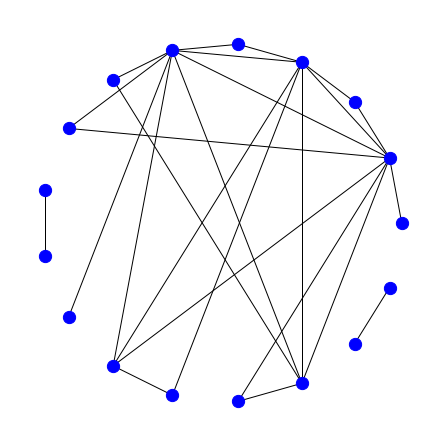

In [64]:
plt.figure(figsize = (6, 6))
nx.draw_circular(Graph_rules, node_color = 'blue', edge_color = 'black', with_labels = False, node_size = 150)